# MANOJ KUMAR - 2048015

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

In [2]:
#Importing the visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the data
kidneyDisease = pd.read_csv('kidney_disease.csv')

## Exploratory Data Analysis

In [4]:
#Shape of the dataset
kidneyDisease.shape

(400, 26)

In [5]:
kidneyDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
kidneyDisease.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Data pre-processing

In [7]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

kidneyDisease.rename(columns=cols_names, inplace=True)

In [8]:
# Dropping the id column and customization

kidneyDisease['red_blood_cell_count'] = pd.to_numeric(kidneyDisease['red_blood_cell_count'], 
                                                      errors='coerce')
kidneyDisease['packed_cell_volume'] = pd.to_numeric(kidneyDisease['packed_cell_volume'], 
                                                    errors='coerce')
kidneyDisease['white_blood_cell_count'] = pd.to_numeric(kidneyDisease['white_blood_cell_count'], 
                                                        errors='coerce')

kidneyDisease.drop(["id"],axis=1,inplace=True) 

In [9]:
kidneyDisease.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
classification               0
dtype: int64

In [10]:
# Numerical & Categorical features:

In [11]:
numerical_features = []
categorical_features = []

for i in kidneyDisease.columns:
    if kidneyDisease[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        
# Numerical
print(numerical_features)
print("\n")
# Categorical 
print(categorical_features)

['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


In [12]:
# Replace incorrect values

kidneyDisease['diabetes_mellitus'] = kidneyDisease['diabetes_mellitus'].replace(to_replace = {'\tno':'no',
                                                                                              '\tyes':'yes',
                                                                                              ' yes':'yes'})
kidneyDisease['coronary_artery_disease'] = kidneyDisease['coronary_artery_disease'].replace(to_replace = '\tno', 
                                                                                            value='no')
kidneyDisease['classification'] = kidneyDisease['classification'].replace(to_replace = 'ckd\t', 
                                                                          value = 'ckd')

In [13]:
# Duplicating df
df = kidneyDisease

# Filter the Numerical data
df1 = df.filter(numerical_features, axis=1)

In [14]:
# Case 1 df with NOT NULL Original data 
df_notnull = df.dropna().filter(numerical_features, axis=1)
df_notnull

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
9,53.0,90.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7
11,63.0,70.0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8
14,68.0,80.0,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6
20,61.0,80.0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [15]:
# Case 2 df with NOT NULL Original data 

from sklearn.impute import SimpleImputer
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
miss_mean_imputer = miss_mean_imputer.fit(df1)
df_imputed = miss_mean_imputer.transform(df1.values)
df_imputed = pd.DataFrame(df_imputed, columns = numerical_features)
df_imputed

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
396,42.0,70.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
397,12.0,80.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
398,17.0,60.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


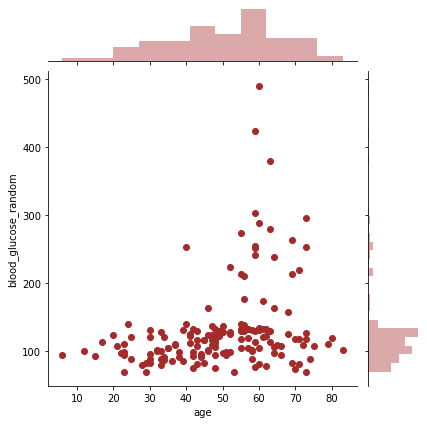

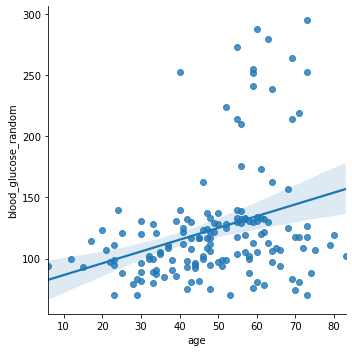

In [16]:
#Jointplot of Time on Website and Yearly Amount Spent
sns.jointplot(x='age',y='blood_glucose_random',data=df_notnull, color='brown')
df_notnull = df_notnull[df_notnull['blood_glucose_random'].between(0, 300)]
sns.lmplot(x='age',y='blood_glucose_random',data=df_notnull)

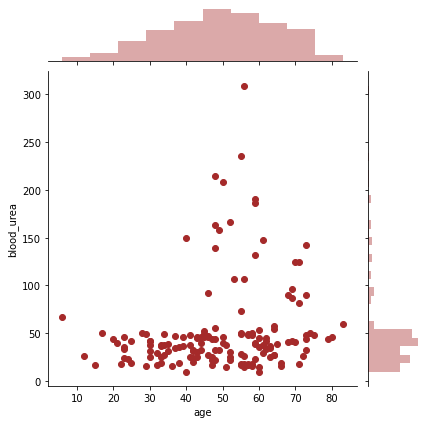

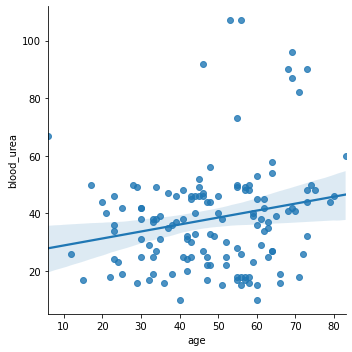

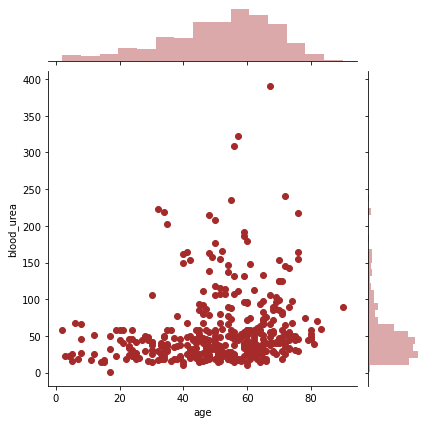

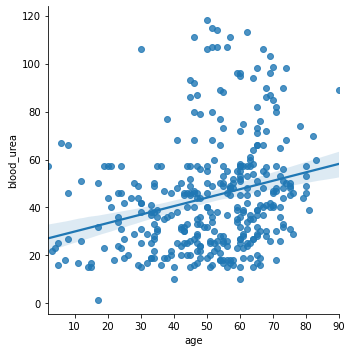

In [17]:
#Jointplot of Time on Website and Yearly Amount Spent
sns.jointplot(x='age',y='blood_urea',data=df_notnull,color='brown')
df_notnull = df_notnull[df_notnull['blood_urea'].between(0, 120)]
sns.lmplot(x='age',y='blood_urea',data=df_notnull)


sns.jointplot(x='age',y='blood_urea',data=df_imputed,color='brown')
df_imputed = df_imputed[df_imputed['blood_urea'].between(0, 120)]
sns.lmplot(x='age',y='blood_urea',data=df_imputed)
# blood_glucose_random blood_urea serum_creatinine sodium

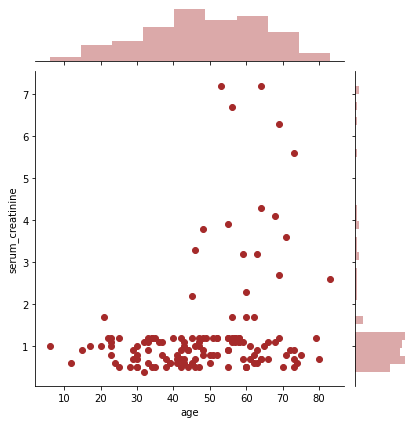

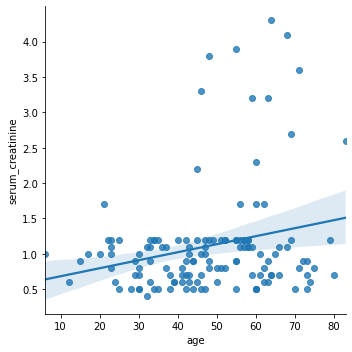

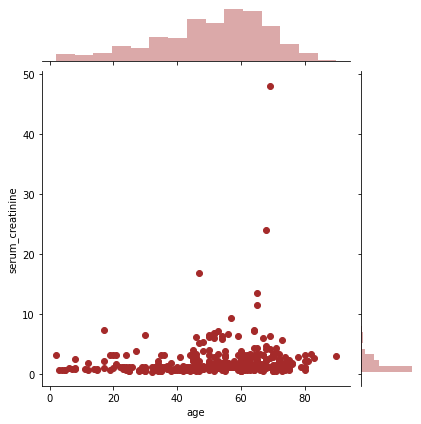

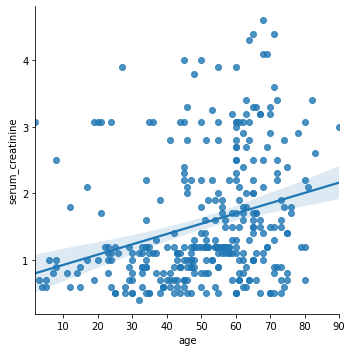

In [18]:
#Jointplot of Time on Website and Yearly Amount Spent
sns.jointplot(x='age',y='serum_creatinine',data=df_notnull,color='brown')
df_notnull = df_notnull[df_notnull['serum_creatinine'].between(0, 5)]
sns.lmplot(x='age',y='serum_creatinine',data=df_notnull)


sns.jointplot(x='age',y='serum_creatinine',data=df_imputed,color='brown')
df_imputed = df_imputed[df_imputed['serum_creatinine'].between(0, 5)]
sns.lmplot(x='age',y='serum_creatinine',data=df_imputed)


# blood_glucose_random blood_urea serum_creatinine sodium

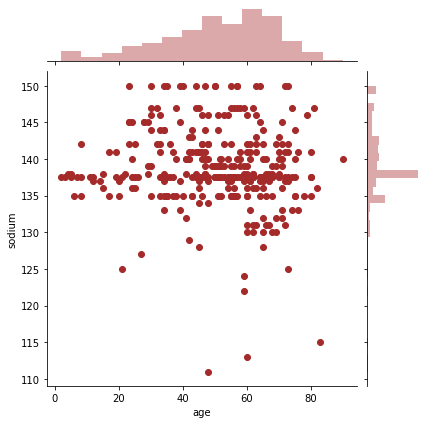

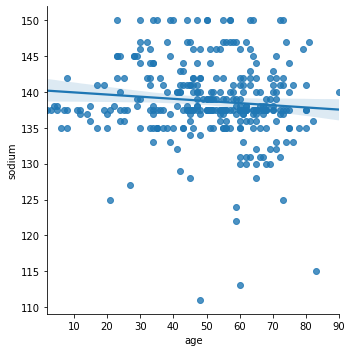

In [19]:
#Jointplot of Time on Website and Yearly Amount Spent

sns.jointplot(x='age',y='sodium',data=df_imputed,color='brown')
df_imputed = df_imputed[df_imputed['sodium'].between(80, 180)]
sns.lmplot(x='age',y='sodium',data=df_imputed)

# blood_glucose_random blood_urea serum_creatinine sodium

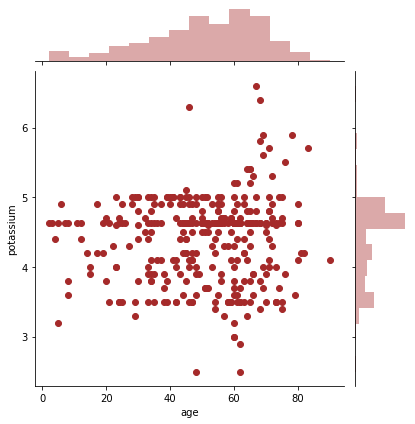

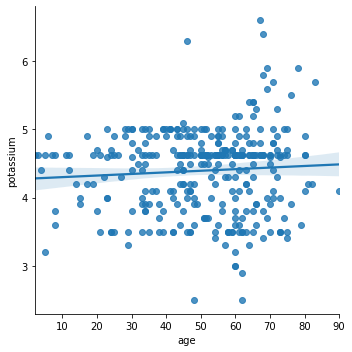

In [20]:
#Jointplot of Time on Website and Yearly Amount Spent

sns.jointplot(x='age',y='potassium',data=df_imputed,color='brown')
sns.lmplot(x='age',y='potassium',data=df_imputed)

# blood_glucose_random blood_urea serum_creatinine sodium potassium

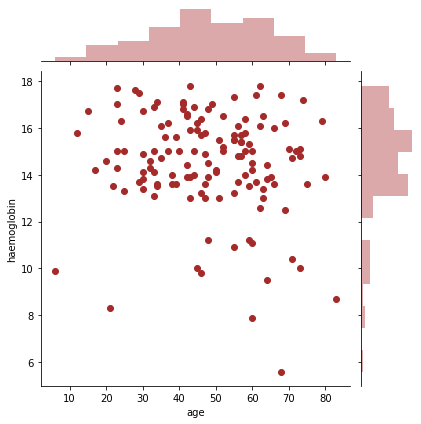

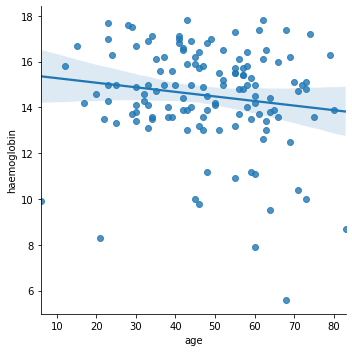

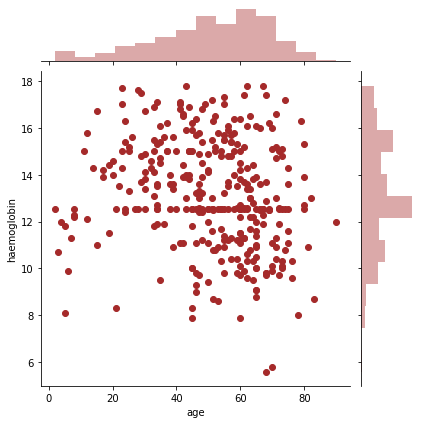

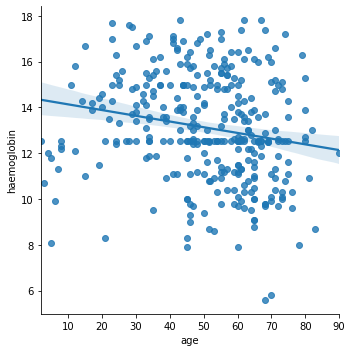

In [21]:
#Jointplot of Time on Website and Yearly Amount Spent
sns.jointplot(x='age',y='haemoglobin',data=df_notnull,color='brown')
sns.lmplot(x='age',y='haemoglobin',data=df_notnull)

sns.jointplot(x='age',y='haemoglobin',data=df_imputed,color='brown')
sns.lmplot(x='age',y='haemoglobin',data=df_imputed)

# blood_glucose_random blood_urea serum_creatinine sodium potassium haemoglobin

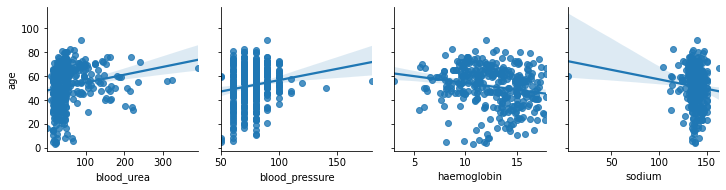

In [22]:
sns.pairplot(df1, 
             x_vars = ['blood_urea', 'blood_pressure',
                      'haemoglobin', 'sodium'], 
             y_vars = 'age', 
             kind   = "reg" )

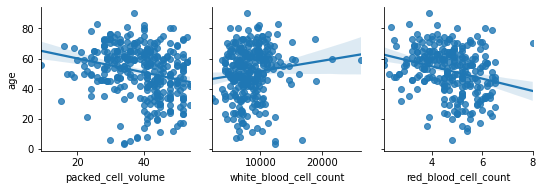

In [23]:
sns.pairplot(df1, 
             x_vars = ['packed_cell_volume', 
                       'white_blood_cell_count', 'red_blood_cell_count'], 
             y_vars = 'age', 
             kind   = "reg" )

In [76]:
#sns.pairplot(df_notnull)

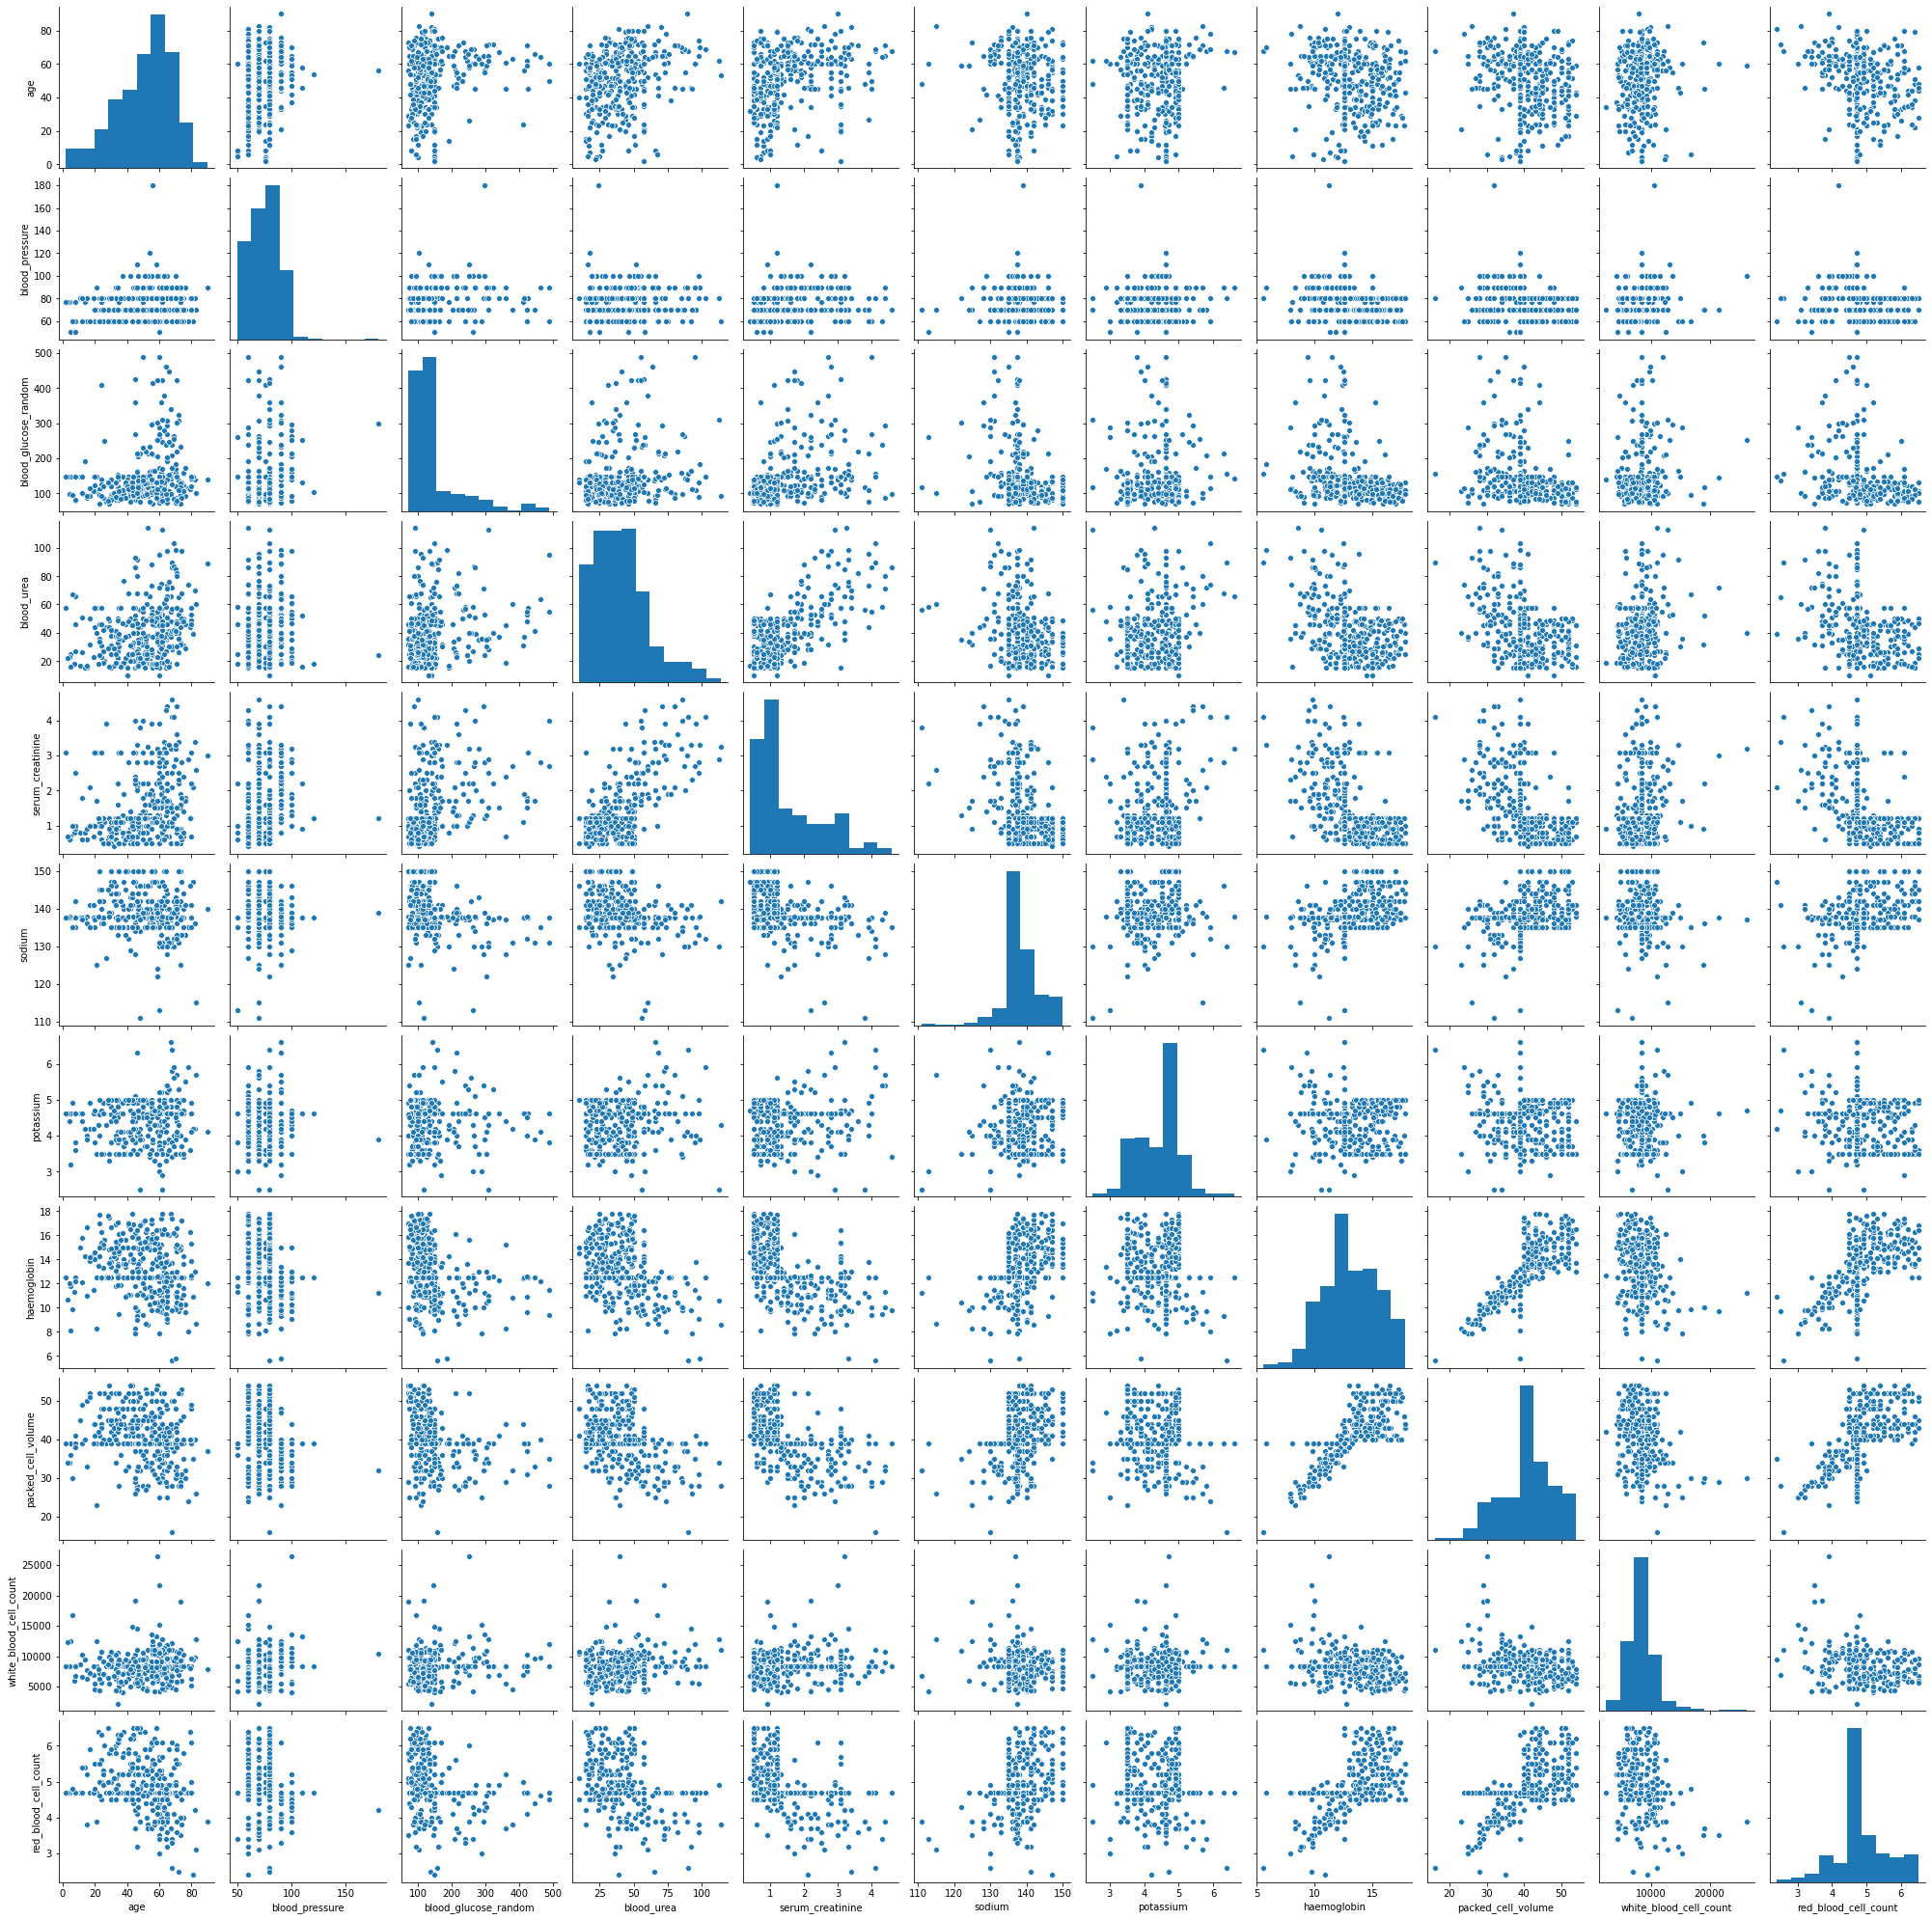

In [75]:
sns.pairplot(df_imputed)

## Modelling

### Simple Linear Regression

In [77]:
# blood_glucose_random blood_urea serum_creatinine sodium potassium haemoglobin packed_cell_volume

X = df_notnull[["packed_cell_volume"]]
Y = df_notnull[['haemoglobin']]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y) #, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [79]:
#Training Accuracy
linreg.score(X_train,y_train)

0.41956783490509464

In [80]:
#Prediction
prediction=linreg.predict(X_test)

In [81]:
#Testing Accuracy
linreg.score(X_test,y_test)

0.6770450767963723

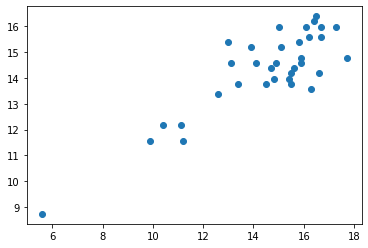

In [82]:
plt.scatter(y_test,prediction)

In [60]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE:  13.335151523466001
MSE:  250.66785064436706
RMSE:  15.832493506847463


In [61]:
coef=pd.DataFrame()
coef['Features'] = X.columns.values
coef['Coefficients'] = linreg.coef_
coef

,Features,Coefficients
0,blood_glucose_random,0.098649


In [83]:
#Testing Accuracy
linreg.score(X_test,y_test)

0.6770450767963723

### Multiple Linear Regression

In [173]:
#Splitting into Training and Testing Data
X=df_notnull.drop(['age'],axis=1)
y=df_notnull[['red_blood_cell_count','potassium']]
X

,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
3,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
14,80.0,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6
27,70.0,264.0,87.0,2.7,130.0,4.0,12.5,37.0,9600.0,4.1
48,70.0,70.0,32.0,0.9,125.0,4.0,10.0,29.0,18900.0,3.5
71,60.0,163.0,92.0,3.3,141.0,4.0,9.8,28.0,14600.0,3.2
...,...,...,...,...,...,...,...,...,...,...
395,80.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,70.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,80.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,60.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [175]:
from sklearn.linear_model import LinearRegression

multi_lr=LinearRegression()
multi_lr.fit(X_train,y_train)

#Training Accuracy
multi_lr.score(X_train,y_train)

1.0

In [176]:
#Prediction
prediction=multi_lr.predict(X_test)

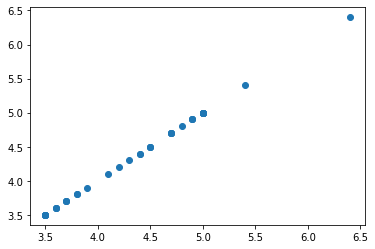

In [177]:
plt.scatter(y_test,prediction)

In [178]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))


MAE:  8.437694987151189e-16
MSE:  9.762153702110021e-31
RMSE:  9.88036117867663e-16


### Key Observation:-<br>
We can see that Simple Linear Regression is doing okay, when we are taking Length of Membership into consideration and predicting the Yearly Amount Spent good

Also in Multiple Linear Regression we took all the values and we can see that Time On App, Avg Session Length is also quite important as Length of Membership

Multiple Linear Regression Performed amazing and we were able to solve the Company's problem